In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import fetch_stock_data
from model_utils import ARIMAModel, SARIMAModel, LSTMModel, train_test_split_ts, calculate_metrics


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Set plotting style
sns.set_palette("husl")

In [3]:
# Fetch Tesla data
data_dict = fetch_stock_data(['TSLA'], '2015-01-01', '2025-01-31')
tesla_data = data_dict['TSLA']

In [4]:
# Prepare closing price series
price_series = tesla_data['Close']

In [5]:
# Split data into training and testing sets
train_data, test_data = train_test_split_ts(price_series)

In [6]:
print("Data Split:")
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Data Split:
Training set size: 2028
Testing set size: 507


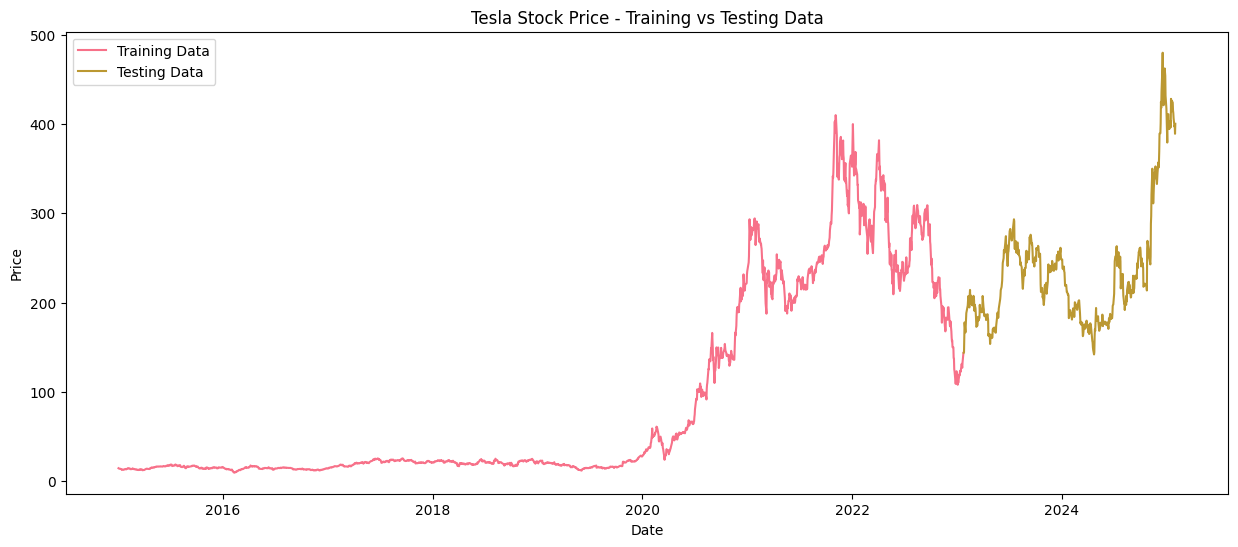

In [7]:
# Plot training and testing data
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.title('Tesla Stock Price - Training vs Testing Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Fitting ARIMA Model...


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has 

Best ARIMA order: (1, 1, 0)

ARIMA Model Results:

Performance Metrics:
MAE: 90.29
RMSE: 111.39
MAPE: 34.79


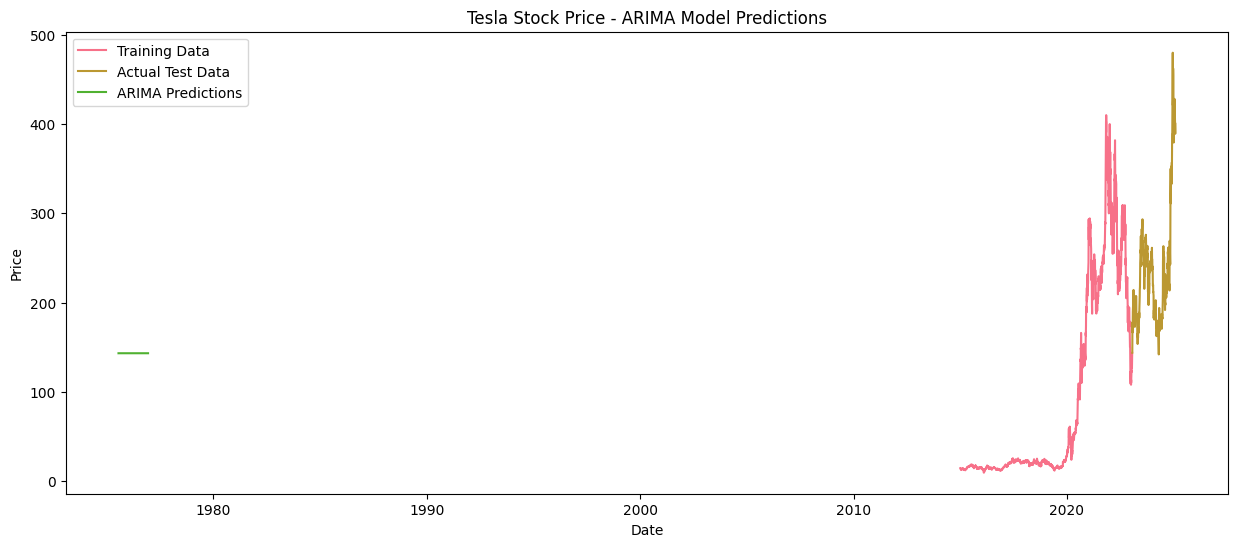

In [8]:
# 1. ARIMA Model
print("\nFitting ARIMA Model...")
arima_model = ARIMAModel()
arima_model.fit(train_data)
print(f"Best ARIMA order: {arima_model.order}")

arima_pred = arima_model.predict(len(test_data))
arima_metrics = calculate_metrics(test_data.values, arima_pred.values)

print("\nARIMA Model Results:")
print("\nPerformance Metrics:")
for metric, value in arima_metrics.items():
    print(f"{metric}: {value:.2f}")

# Plot ARIMA results
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data')
plt.plot(arima_pred, label='ARIMA Predictions')
plt.title('Tesla Stock Price - ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Fitting SARIMA Model...


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has 

Best SARIMA order: (2, 1, 2)
Best seasonal order: (0, 1, 1, 12)

SARIMA Model Results:

Performance Metrics:
MAE: 75.12
RMSE: 96.70
MAPE: 28.35


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


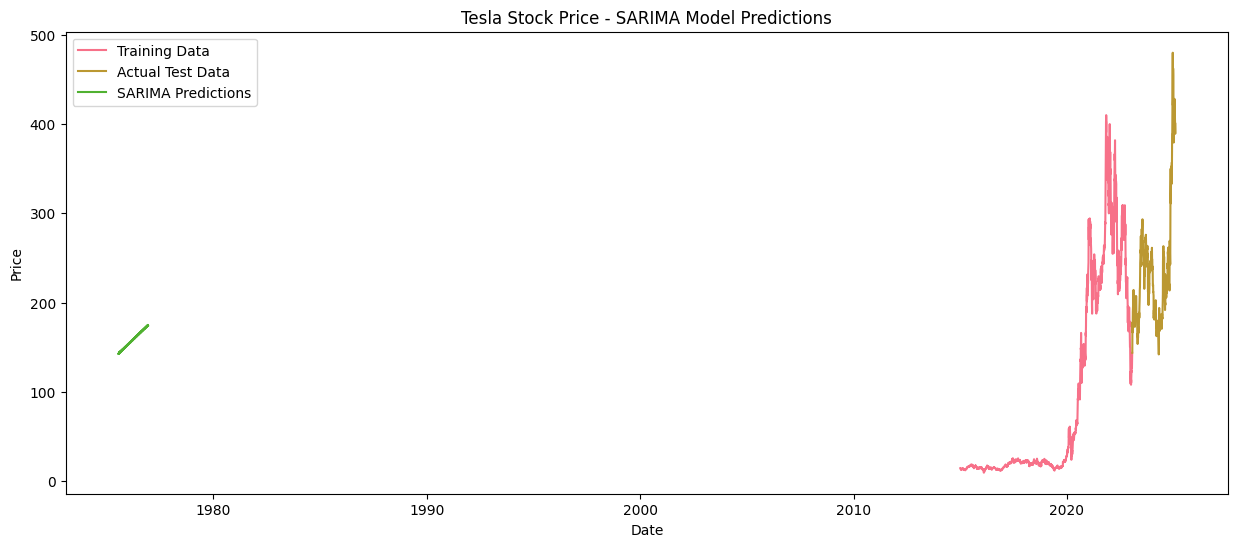

In [9]:
# 2. SARIMA Model
print("\nFitting SARIMA Model...")
sarima_model = SARIMAModel()
sarima_model.fit(train_data)
print(f"Best SARIMA order: {sarima_model.order}")
print(f"Best seasonal order: {sarima_model.seasonal_order}")

sarima_pred = sarima_model.predict(len(test_data))
sarima_metrics = calculate_metrics(test_data.values, sarima_pred.values)

print("\nSARIMA Model Results:")
print("\nPerformance Metrics:")
for metric, value in sarima_metrics.items():
    print(f"{metric}: {value:.2f}")

# Plot SARIMA results
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data')
plt.plot(sarima_pred, label='SARIMA Predictions')
plt.title('Tesla Stock Price - SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



Fitting LSTM Model...


c:\Users\hp\Documents\AI_Driven_PortfolioManagement\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - loss: 0.0212 - val_loss: 0.0150
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0021 - val_loss: 0.0045
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - los

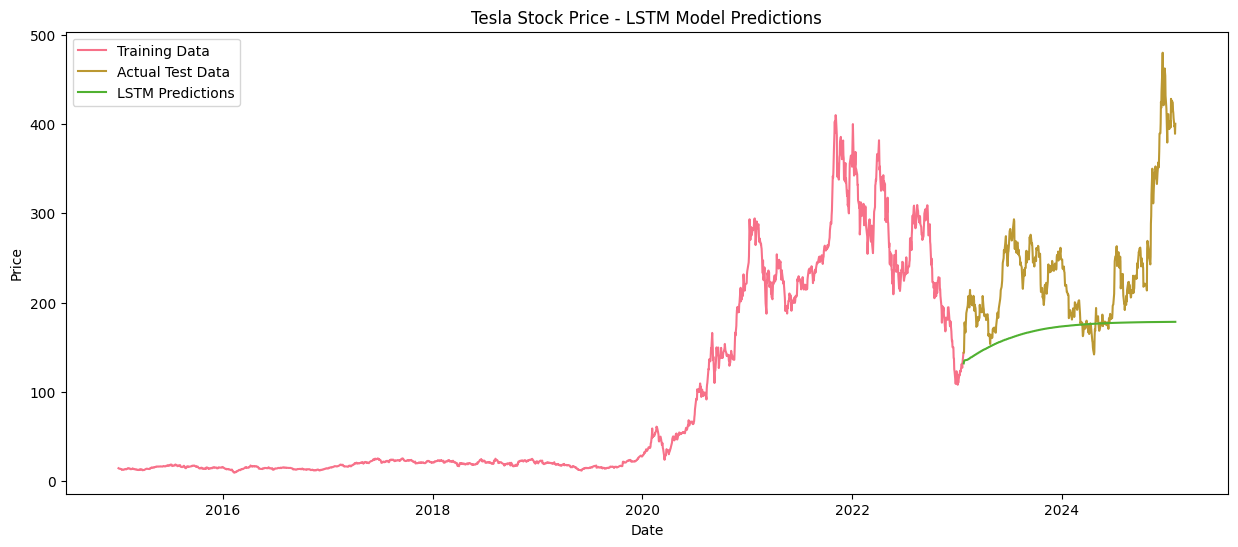

In [10]:
# 3. LSTM Model
print("\nFitting LSTM Model...")
lstm_model = LSTMModel(sequence_length=60)
lstm_model.fit(train_data, epochs=50)

lstm_pred = lstm_model.predict(train_data, len(test_data))
lstm_pred = pd.Series(lstm_pred, index=test_data.index)
lstm_metrics = calculate_metrics(test_data.values, lstm_pred.values)

print("\nLSTM Model Results:")
print("\nPerformance Metrics:")
for metric, value in lstm_metrics.items():
    print(f"{metric}: {value:.2f}")

# Plot LSTM results
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data')
plt.plot(lstm_pred, label='LSTM Predictions')
plt.title('Tesla Stock Price - LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

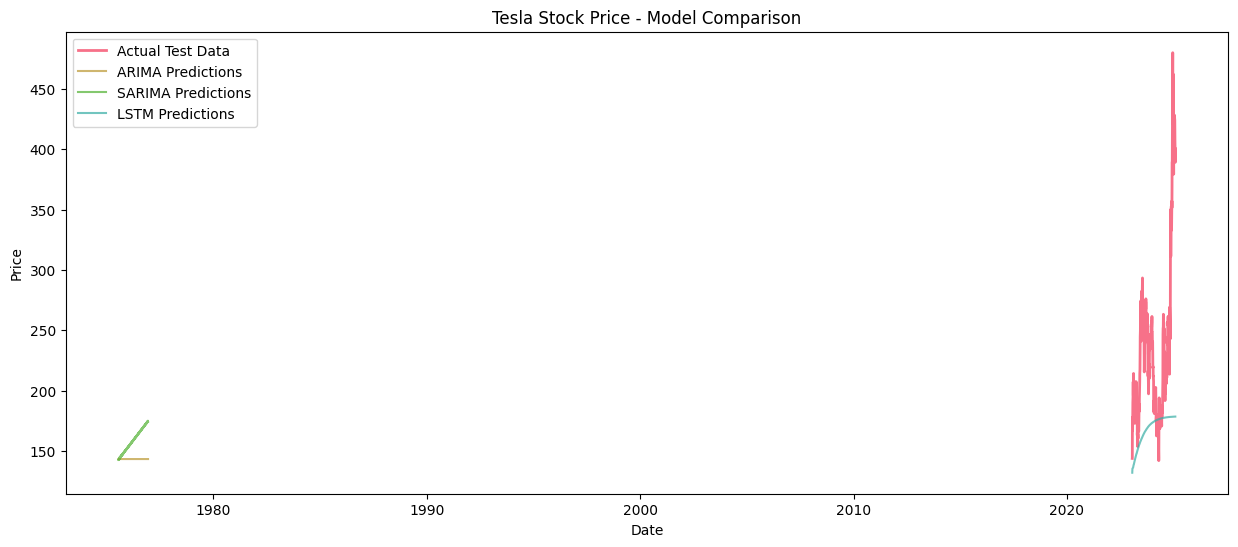

In [11]:
# Compare all models
plt.figure(figsize=(15, 6))
plt.plot(test_data, label='Actual Test Data', linewidth=2)
plt.plot(arima_pred, label='ARIMA Predictions', alpha=0.7)
plt.plot(sarima_pred, label='SARIMA Predictions', alpha=0.7)
plt.plot(lstm_pred, label='LSTM Predictions', alpha=0.7)
plt.title('Tesla Stock Price - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# Print final comparison
print("\nModel Comparison:")
models = {
    'ARIMA': arima_metrics,
    'SARIMA': sarima_metrics,
    'LSTM': lstm_metrics
}

for model_name, metrics in models.items():
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")


Model Comparison:

ARIMA Metrics:
MAE: 90.29
RMSE: 111.39
MAPE: 34.79

SARIMA Metrics:
MAE: 75.12
RMSE: 96.70
MAPE: 28.35

LSTM Metrics:
MAE: 66.56
RMSE: 90.22
MAPE: 24.64
